# Import Library

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Load Dataset

In [ ]:
import yfinance as yf
import pandas as pd

tickers = ['META']

data = yf.download(tickers, start='2020-07-01', end='2025-07-01')

close = data.xs('Close', axis=1, level=0)

close



/tmp/ipython-input-3-753031247.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-07-01', end='2025-07-01')
[*********************100%***********************]  1 of 1 completed


Ticker,META
Date,
2020-07-01,236.253876
2020-07-02,232.146439
2020-07-06,238.968994
2020-07-07,239.545822
2020-07-08,242.250992
...,...
2025-06-24,712.200012
2025-06-25,708.679993
2025-06-26,726.090027


# Market and Problem Cntext

Why META?

Meta Platforms was selected because it offers a prime example of a **high-growth, high-risk** asset—perfect for demonstrating risk metrics like VaR, CVaR, and DD. The stock has been subject to several notable **downward pressures**, such as:

- **Aggressive AI spending**: Huge investments in recruiting top-tier AI talent and a new AI superintelligence lab, raising concerns about ballooning costs (e.g. $100 million+ sign-on packages, 14 billion dollars into Scale AI) Source: (https://www.marketwatch.com/story/is-metas-pricey-ai-hiring-spree-worth-it-this-analyst-has-doubts-6c33e2b5)

- **Margin compression**: Analyst warnings that these heavy AI expenses may significantly hit profit margins if revenue growth doesn't keep pace  Source: (https://www.nasdaq.com/articles/why-meta-platforms-stock-slumped-discouraging-ai-speculation-friday)

- **Product delays & tech risk**: Ongoing delays in AI rollout (“Behemoth” model) have triggered stock drops (~0.6% on delay news).

- **Macroeconomic and regulatory pressure**: Advertising slowdown, trade-tariff uncertainty, and regulatory scrutiny around data/privacy add volatility. Source: (https://www.investors.com/news/technology/meta-stock-ad-market-slowdown-ai-spending-zuckerberg/)

These negative factors make META an ideal case study: it combines **high return potential** with significant **tail risk**, making methods like CVaR and DD especially relevant.


# Preprocessing the Data

In [ ]:
close.isnull().sum()

,0
Ticker,
META,0


# Business Understanding

This analysis aims to quantify the downside risk associated with META stock using key financial risk metrics: Value at Risk (VaR), Conditional Value at Risk (CVaR), and Downside Deviation (DD). These models help capture not just how much the stock moves on average, but how severe the losses can be during extreme downturns — a crucial perspective for investors navigating META’s volatility and strategic shifts.


# Exploring Data

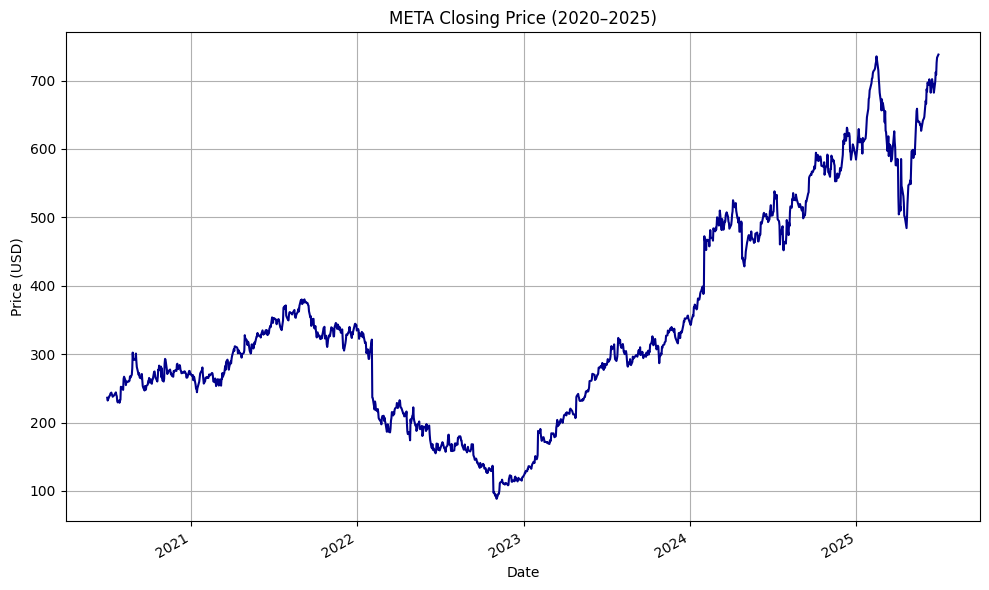

In [ ]:
# Line plot of META closing price
plt.figure(figsize=(10,6))
close['META'].plot(color='darkblue')
plt.title('META Closing Price (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


META Closing Price (2020–2025) – Analysis

The chart above displays the daily closing price of META from mid-2020 to mid-2025. Overall, the long-term trend is strongly upward, with the stock price increasing more than threefold over the five-year period. Despite some significant drawdowns, the recovery and growth momentum remain impressive by the end of the timeline.

In the earlier phase (2020–2021), META experienced a relatively steady climb, likely supported by post-pandemic optimism and strong performance across the tech sector. This trend reverses sharply around late 2021 to 2022, where a notable downtrend occurs. This decline may have been driven by broader market corrections, economic uncertainty, or company-specific transitions such as its rebranding and strategic shift toward the metaverse.

Starting in early 2023, the price begins to recover in a clear V-shaped pattern. The stock not only rebounds but enters a sustained growth phase, marked by stronger upward momentum and increasingly volatile movements, particularly in 2025. Price swings widen significantly during this final period, suggesting heightened investor speculation or reaction to earnings and macroeconomic shifts.

Overall, while the chart does not directly show returns or risk, it establishes a clear context: META is a high-growth but high-volatility asset. This makes it an ideal candidate for further return-based risk analysis using metrics like Value at Risk (VaR), Conditional VaR (CVaR), and Downside Deviation (DD).


In [ ]:
print(close.describe())

Ticker         META
count   1255.000000
mean     341.951850
std      154.265788
min       88.424904
25%      232.186226
50%      308.268829
75%      472.335403
max      738.090027


📊 Descriptive Statistics – META Daily Closing Price (2020–2025)

This summary provides an overview of META's closing price behavior over 1,255 trading days.

- **Mean price**: \$341.95 — the average price META closed at throughout the period.
- **Standard deviation**: \$154.27 — shows that daily prices fluctuated heavily; this isn’t a quiet stock.
- **Min / Max**: From \$88.42 to \$738.09 — wide extremes that confirm META's volatility.
- **Median (50%)**: \$308.27 — a bit lower than the mean, suggesting some large values on the high end skew the average upward.

Quartiles:
- **25th percentile (Q1)**: \$232.19  
  → This means that 25% of the time, META traded **below** \$232 — useful for setting a lower bound in typical market conditions.
- **75th percentile (Q3)**: \$472.34  
  → Conversely, 75% of the time, prices stayed **below** \$472 — meaning the upper quartile reflects more rare high valuations.

The spread between Q1 and Q3 (the **interquartile range**) is about \$240, which shows a broad “normal” range of fluctuation. It tells us that even without considering extreme highs/lows, META's price movement is still wide, reinforcing the idea that this is a volatile asset.

**Conclusion:**  
The distribution is wide, skewed to the upside, and highly volatile — which justifies further tail-risk-focused analysis like VaR, CVaR, and DD.


# VaR and CVaR

## META Stock's Return

In [ ]:
returns = close.pct_change().dropna()

In [ ]:
# Descriptive statistics for META daily returns
meta_returns = returns['META']
print(meta_returns.describe())


count    1254.000000
mean        0.001295
std         0.027654
min        -0.263901
25%        -0.011578
50%         0.000908
75%         0.014362
max         0.232824
Name: META, dtype: float64


📈 Descriptive Statistics – META Daily Return

This summary captures the behavior of META’s daily percentage returns over the entire period.

- **Mean**: 0.001295 (~0.13%)  
  → On average, META delivered a positive return per trading day. While small, this compounds significantly over time.

- **Standard Deviation**: 0.02765 (~2.76%)  
  → The daily returns fluctuate heavily. META is a volatile stock, consistent with its wide price movements.

- **Min / Max**: -26.39% to +23.28%  
  → These extreme values highlight tail events — possibly earnings reactions or macro shocks. Such large single-day changes justify using tail-risk measures like VaR and CVaR.

- **Median (50%)**: 0.000908 (~0.09%)  
  → Slightly below the mean, suggesting some right-skewed behavior (rare large positive returns pulling the mean up).

Quartiles:
- **25th percentile**: -1.16%  
  → On 25% of trading days, META dropped more than 1.16%.
- **75th percentile**: +1.44%  
  → On 75% of days, returns stayed below 1.44%.

The return distribution is relatively balanced but includes sharp outliers in both directions — especially negative ones. Combined with the high standard deviation, this confirms the need for deeper analysis of downside risk.


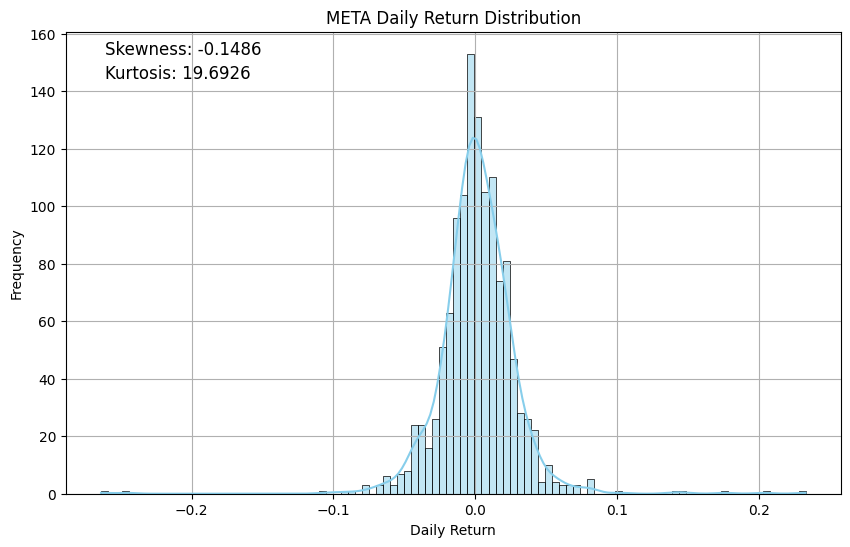

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Distribution plot with skewness and kurtosis annotations
plt.figure(figsize=(10,6))
sns.histplot(meta_returns, bins=100, kde=True, color='skyblue')
plt.title('META Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)

# Calculate skewness and kurtosis
sk = skew(meta_returns)
kt = kurtosis(meta_returns)

# Annotate skewness and kurtosis
plt.annotate(f"Skewness: {sk:.4f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)
plt.annotate(f"Kurtosis: {kt:.4f}", xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12)

plt.show()


📊 META Daily Return Distribution

The histogram above shows the distribution of META’s daily returns from 2020 to 2025. The shape is bell-like, centered around zero, but far from being a perfect normal distribution.

- **Skewness = -0.1486**  
  Slightly negative skew means the left tail (losses) is marginally heavier than the right. META has a small tendency for more extreme negative returns than positive ones.

- **Kurtosis = 19.6926**  
  This is extremely high — a normal distribution has a kurtosis of 3. Such a value suggests **fat tails**: extreme returns (both gains and losses) occur much more frequently than expected under normal assumptions.

Visually, we can see a tall, sharp peak near zero and unusually thick tails on both sides. These characteristics make traditional risk models that assume normality insufficient. Hence, risk measures like **VaR and CVaR**, which focus on the left tail, are more appropriate for assessing potential loss exposure in META's case.


# Mathematical Finance Models

## Value at Risk (VaR)

VaR 95% (1-day): -3.9943%


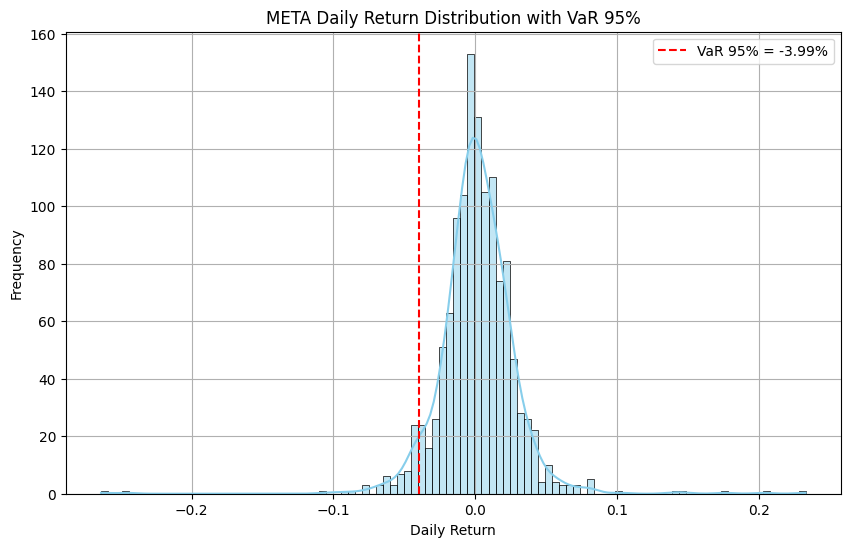

In [ ]:
# Select META returns
meta_returns = returns['META']

# Set confidence level
confidence_level = 0.95

# Compute VaR (Value at Risk)
var_95 = np.percentile(meta_returns, (1 - confidence_level) * 100)

# Print result
print(f"VaR 95% (1-day): {var_95:.4%}")

plt.figure(figsize=(10,6))
sns.histplot(meta_returns, bins=100, kde=True, color='skyblue')
plt.axvline(var_95, color='red', linestyle='--', label=f"VaR 95% = {var_95:.2%}")
plt.title('META Daily Return Distribution with VaR 95%')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



📉 Value at Risk (VaR) – Concept Overview

**Value at Risk (VaR)** is a widely used risk measure that estimates the **maximum expected loss** over a given time period at a specific confidence level. In simpler terms, it answers the question:

> *“What’s the worst loss I can expect, under normal market conditions, with X% confidence?”*

VaR helps investors and risk managers understand how much they could potentially lose on a bad day — but **without** assuming extreme market crashes. It’s especially useful for setting risk limits and evaluating exposure.

**Formula:**

$$
\text{VaR}_{\alpha} = \text{Quantile}_{1 - \alpha}(R)
$$

Where:
- $\alpha$:  the confidence level (e.g., 95%)
- $R$:  the return distribution
- $\text{Quantile}_{1 - \alpha}$:  gives the return threshold below which only $( (1 - \alpha) \times 100\% )$ of losses occur

---

📉 VaR 95% Visualization – META Daily Return

The chart above overlays META’s daily return distribution with a red dashed line representing the **95% Value at Risk (VaR)**. This threshold, calculated at **-3.99%**, indicates that on 5% of trading days, META's return was worse than –3.99%.

This means:
> There’s a 5% chance that the stock may drop **more than 3.99%** on any given day.

The histogram confirms this visually — while most returns are clustered around zero, the **left tail** beyond the VaR line shows a small but significant portion of days where losses are more severe.

This is why VaR is widely used in risk management: it gives a quantifiable boundary for expected worst-case scenarios under normal market conditions. However, it **does not** tell us how bad losses can get beyond that — which is where **CVaR** comes in.


In [ ]:
# Simulate investment
initial_investment = 1_000_000  # $1,000,000

# Calculate CVaR loss in dollars
var_loss_amount = initial_investment * abs(var_95)

# Print result
print(f"Estimated 1-day loss (95% confidence) on ${initial_investment:,.0f}: ${var_loss_amount:,.2f}")

Estimated 1-day loss (95% confidence) on $1,000,000: $39,943.01


This simulation above means there's a 5% chance you could lose at least $39,943 in a single day.

# Conditional Value at Risk (CvaR)

CVaR 95% (1-day): -5.8687%


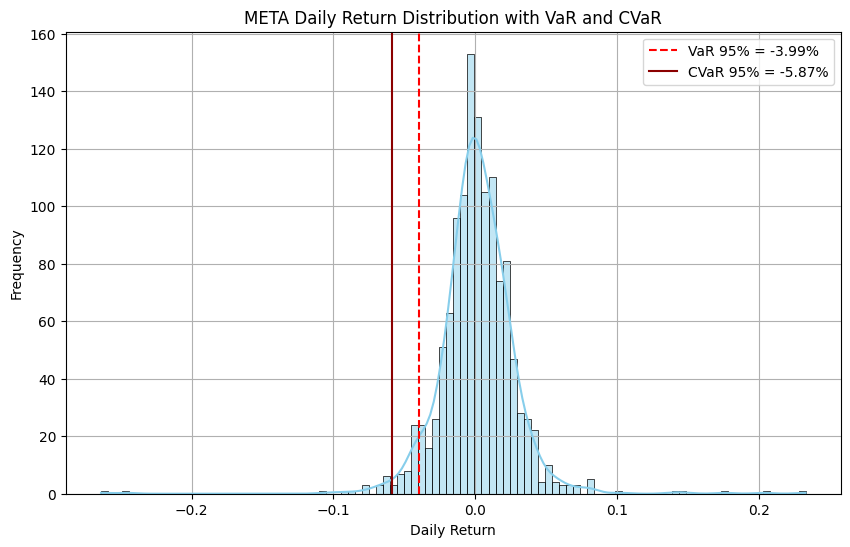

In [ ]:
# Filter returns below or equal to the VaR threshold
cvar_95 = meta_returns[meta_returns <= var_95].mean()

# Display result
print(f"CVaR 95% (1-day): {cvar_95:.4%}")

plt.figure(figsize=(10,6))
sns.histplot(meta_returns, bins=100, kde=True, color='skyblue')
plt.axvline(var_95, color='red', linestyle='--', label=f"VaR 95% = {var_95:.2%}")
plt.axvline(cvar_95, color='darkred', linestyle='-', label=f"CVaR 95% = {cvar_95:.2%}")
plt.title('META Daily Return Distribution with VaR and CVaR')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


📉 Conditional Value at Risk (CVaR) – Concept Overview

**Conditional Value at Risk (CVaR)**, also known as **Expected Shortfall**, is a risk measure that estimates the **average loss** assuming that a loss **has already exceeded** the VaR threshold. In contrast to VaR — which only sets a cutoff point — CVaR tells you how bad things can actually get **beyond that point**.

CVaR addresses a key limitation of VaR:  
> While VaR shows the minimum expected loss in the worst-case tail, CVaR shows the **average** of those worst outcomes.

This makes CVaR a more conservative and informative risk measure — especially useful in markets with **fat tails**, like equities and crypto, where extreme losses are not as rare as normal distributions suggest.

**Formula:**

$$
\text{CVaR}_{\alpha} = \mathbb{E}[R \mid R \leq \text{VaR}_{\alpha}]
$$

Where:
- $\alpha$:  the confidence level (e.g., 95%)
- $R$:  the return distribution
- $\text{VaR}_\alpha$:  the Value at Risk at level $\alpha$
- $\mathbb{E}$:  expectation (average) over the tail distribution

---

📉 VaR vs. CVaR – META Daily Return (95% Confidence)

The chart above visualizes both **Value at Risk (VaR)** and **Conditional Value at Risk (CVaR)** for META’s daily returns at the 95% confidence level.

- **VaR 95% = –3.99%**  
  This red dashed line marks the return threshold below which only the worst 5% of trading days fall. It tells us that in 95% of cases, the daily loss will not exceed 3.99%.

- **CVaR 95% = –5.87%**  
  The solid dark red line represents the average return on the worst 5% of days — that is, the **expected loss given that a "tail event" actually happens**. It reflects a more realistic estimate of loss severity in extreme scenarios.

The gap between the two lines highlights an important insight:  
> **Losses in the worst-case tail can be significantly worse than what VaR alone suggests.**

This supports the idea that CVaR is more informative than VaR when assessing downside risk — especially for assets like META, which exhibit fat tails and high kurtosis.

In short:
- VaR gives a threshold.
- CVaR tells you what to expect when that threshold is broken.


In [ ]:
# Investment amount
initial_investment = 1_000_000  # $1,000,000

# Calculate CVaR loss in dollars
cvar_loss_amount = initial_investment * abs(cvar_95)

# Print result
print(f"Estimated 1-day CVaR loss (95% confidence) on ${initial_investment:,.0f}: ${cvar_loss_amount:,.2f}")


Estimated 1-day CVaR loss (95% confidence) on $1,000,000: $58,687.05


💥 CVaR Loss Simulation – Dollar Impact

With a portfolio value of **$1,000,000**, the Conditional Value at Risk (CVaR) at the 95% confidence level is estimated at **58,687.05 dollars**. This figure represents the **average loss** an investor might experience in the **worst 5% of trading days**.

Unlike VaR, which only tells you the minimum threshold for the worst-case days, CVaR quantifies how much you'd actually expect to lose **if** such a bad day occurs.

In simple terms:  
> “If the market crashes beyond the normal limit, I can expect to lose around **\$58,687** on a really bad day.”

This is especially critical for risk management and position sizing — helping investors prepare not just for how often losses may happen, but how severe they could be when they do.


## DD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming meta_returns is already defined

# Target return (usually 0 or risk-free rate)
target_return = 0

# Downside deviations only (returns below target)
downside_diff = np.minimum(0, meta_returns - target_return)

# DD = square root of mean squared downside
DD = np.sqrt(np.mean(downside_diff**2))

# Standard deviation (for comparison)
std_dev = np.std(meta_returns)

# Count of negative returns (optional check)
n_neg = (meta_returns < target_return).sum()

# Print results
print(f"Standard Deviation        : {std_dev:.4%}")
print(f"Downside Deviation: {DD:.4%}")
print(f"Negative return days       : {n_neg} of {len(meta_returns)}")


Standard Deviation        : 2.7643%
Downside Deviation: 1.8872%
Negative return days       : 602 of 1254


📉 Downside Deviation (DD) – Concept Overview

**Downside Deviation (DD)** is a risk metric that quantifies the **volatility of negative returns only**, relative to a chosen target (often 0%). Unlike standard deviation — which includes both gains and losses — DD focuses solely on the downside, making it more relevant for investors concerned with capital preservation.

This measure is especially helpful in evaluating **risk-adjusted performance**, as it doesn’t penalize returns that are above the target.

**Formula:**

$$
\text{DD} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \min(0, R_i - R_{\text{target}})^2 }
$$

Where:
- $R_i$: individual return  
- $R_{\text{target}}$: target return (often 0%)  
- $n$: number of observations  
- $\min(0, R_i - R_{\text{target}})$: captures only downside deviations


---

📉 Downside Deviation (DD)

While standard deviation measures overall volatility (both up and down), **Downside Deviation (DD)** focuses only on the negative side — making it more aligned with actual risk perception.

From the results:
- **Standard deviation**: 2.76%  
  → Reflects total daily volatility of META’s return.
  
- **DD**: 1.89%  
  → Represents the average magnitude of downside volatility, i.e., how much returns tend to drop on days when they’re negative.

- **Negative return days**: 602 out of 1,254  
  → Almost half the days (~48%) saw a drop in price, reinforcing that downside moves are not rare events.

DD is particularly useful in risk metrics like the **Sortino Ratio**, because it penalizes only harmful volatility (losses), unlike the Sharpe Ratio that treats upside and downside equally.


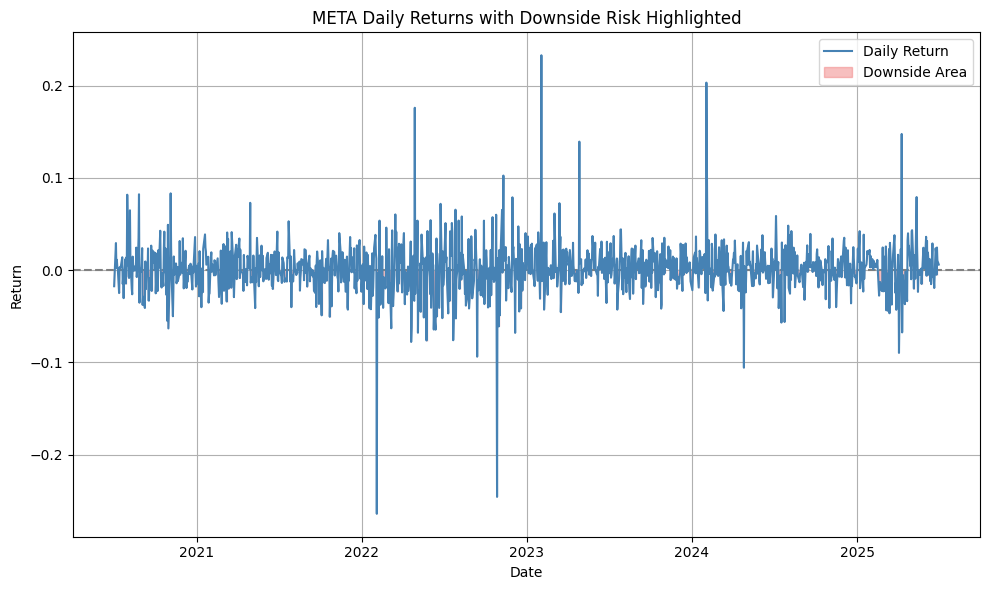

In [ ]:
 plt.figure(figsize=(10,6))
plt.axhline(0, color='gray', linestyle='--')
plt.plot(meta_returns.index, meta_returns, label='Daily Return', color='steelblue')
plt.fill_between(meta_returns.index, meta_returns, target_return,
                 where=(meta_returns < target_return),
                 color='lightcoral', alpha=0.5, label='Downside Area')
plt.title('META Daily Returns with Downside Risk Highlighted')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📉 META Daily Returns with Downside Risk Highlighted

The time series plot above illustrates META’s daily return performance between 2020 and 2025. The red-shaded regions represent **downside return events** — days when META’s return fell below zero.

Key insights:
- **Negative returns are frequent** and distributed across the entire period, not isolated to one crisis or event.
- Some downside spikes are clearly visible (notably in 2022 and early 2023), suggesting that META occasionally experiences **sharp drawdowns**.
- The visual contrast between daily noise and deeper red spikes emphasizes why downside-specific measures like **DD and CVaR** are crucial.

By isolating and highlighting these events, this plot helps investors focus on periods of real risk rather than being distracted by general volatility. It reinforces the importance of measuring **asymmetric risk** — losses matter more than gains when protecting capital.


## Sortino Ratio

In [ ]:
  # Define target return (risk-free rate, here assumed 0)
rf = 0  # daily risk-free rate

# Mean daily return
mean_return = meta_returns.mean()

# Reuse previous downside deviation
downside_diff = np.minimum(0, meta_returns - rf)
DD = np.sqrt(np.mean(downside_diff**2))

# Sortino Ratio
sortino_ratio = (mean_return - rf) / DD

# Print results
print(f"Mean Daily Return  : {mean_return:.4%}")
print(f"DD                : {DD:.4%}")
print(f"Sortino Ratio      : {sortino_ratio:.4f}")


Mean Daily Return  : 0.1295%
DD                : 1.8872%
Sortino Ratio      : 0.0686


📈 Sortino Ratio – Concept Overview

The **Sortino Ratio** is a popular metric for evaluating risk-adjusted performance. Unlike the Sharpe Ratio, which penalizes all volatility equally, the Sortino Ratio isolates **downside risk only**, making it more relevant for investors focused on capital preservation.

This ratio helps answer:  
> *"How much return am I getting per unit of downside risk?"*

It is particularly useful for assets with asymmetric return distributions or frequent drawdowns.

**Formula:**

$$
\text{Sortino Ratio} = \frac{R_{\text{mean}} - R_{\text{target}}}{\text{DD}}
$$

Where:
- $R_{\text{mean}}$: average return  
- $R_{\text{target}}$: target return (commonly 0%)  
- $\text{DD}$: Downside Deviation



---

📈 Sortino Ratio – Risk-Adjusted Performance

The **Sortino Ratio** is a refinement of the Sharpe Ratio that focuses solely on downside volatility. It compares the mean return to the **Downside Deviation (DD)**, offering a clearer view of performance relative to risk of loss.

From the results:
- **Mean daily return**: 0.1295%  
  → This is the average return META delivered per trading day across the sample.

- **DD**: 1.8872%  
  → Measures how severe the negative returns tend to be.

- **Sortino Ratio**: 0.0686  
  → A low value, suggesting that for each unit of downside risk taken, META only delivered a small amount of excess return.

Unlike Sharpe, which is distorted by upside volatility, Sortino focuses only on harmful movements — making it better suited for assessing risk-adjusted performance in volatile stocks like META. In this case, META’s modest average return combined with frequent downside events leads to a relatively weak Sortino score.


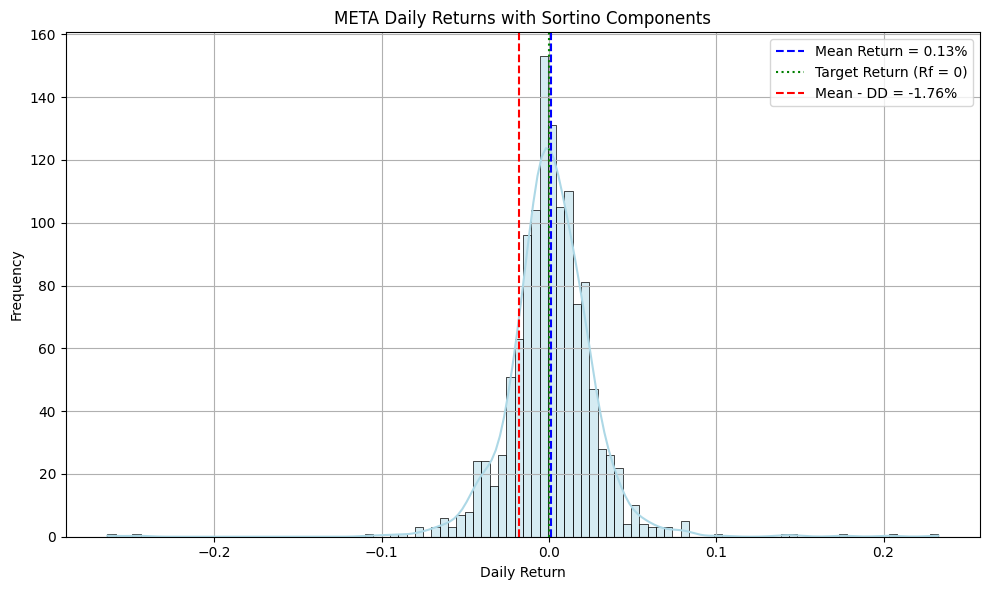

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(meta_returns, bins=100, kde=True, color='lightblue')
plt.axvline(mean_return, color='blue', linestyle='--', label=f"Mean Return = {mean_return:.2%}")
plt.axvline(rf, color='green', linestyle=':', label="Target Return (Rf = 0)")
plt.axvline(mean_return - DD, color='red', linestyle='--', label=f"Mean - DD = {mean_return - DD:.2%}")
plt.title("META Daily Returns with Sortino Components")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 META Daily Returns with Sortino Components

This chart overlays the return distribution with key components used in the **Sortino Ratio** calculation.

- **Blue dashed line**: Average return (~0.13%)  
  → Represents the mean of all daily returns. A measure of performance.

- **Black line at 0%**: Target return (risk-free or minimum acceptable return)  
  → In this case, we assume a target return of 0%, meaning anything below this is considered a “bad” return.

- **Red dashed line**: Mean – DD (~–1.76%)  
  → Illustrates the average downside-adjusted return, factoring in the  Downside Deviation.

From this, we can observe:
- The mean return is only marginally above the target return.
- The distribution is centered close to zero, but with noticeable fat tails — especially on the downside.
- The significant distance between the mean and downside-adjusted level (mean – DD) explains the **low Sortino Ratio (~0.07)** — indicating that the returns barely compensate for the downside risk taken.

This visualization reinforces the conclusion that while META delivers some gains, the **risk of underperformance remains high** due to frequent and severe negative returns.


# Summary

🧾 Summary – Risk Analysis of META Stock (2020–2025)

This study explores the downside risk of META (Meta Platforms Inc.) by applying modern risk metrics beyond traditional volatility — namely **Value at Risk (VaR)**, **Conditional VaR (CVaR)**, **Downside Deviation (DD)**, and the **Sortino Ratio**.

Key insights derived from the analysis include:

- **META experienced significant volatility**, with daily returns ranging from –26.39% to +23.28%.
- **VaR 95%** indicates a 5% chance of losing more than **3.99%** on a single day.
- **CVaR 95%**, which captures the expected loss beyond VaR, reached **–5.87%**, highlighting deeper tail risk.
- When simulated on a $1,000,000 investment:
  - **VaR loss** ≈ $39,943  
  - **CVaR loss** ≈ $58,687
- **Downside Deviation (DD)** was measured at **1.89%**, showing the average magnitude of negative returns.
- Out of 1,254 trading days, **602 were negative**, suggesting frequent downside pressure.
- **Sortino Ratio = 0.0686**, a low figure, indicating that the average return (0.13%) barely compensated for the downside risk taken.
- Distribution was **fat-tailed (kurtosis = 19.69)** and slightly **negatively skewed**, justifying the use of tail risk models.

💡 Recommendations

- **For researchers**:    
  This analysis focuses solely on **univariate, historical-based risk measures** using daily returns from a single asset (META). Future studies should aim to:
  
  - Expand to **multi-asset portfolios** to assess diversification effects on downside risk.
  - Incorporate **macroeconomic or sentiment indicators** to enrich tail risk prediction.
  - Compare CVaR/DD with **parametric VaR models** (e.g., Gaussian, Cornish-Fisher, GARCH-based).

- **For investors**:  
  While META has shown strong growth in recent years, this analysis reveals something important — the stock can drop sharply, and those drops happen more often than you might expect.

  Here’s what you should take away:
  
  - Don’t focus only on the average return — look at how bad the worst days can be.
  - Prepare for rough days: META has a history of sudden losses that may catch you off guard.
  - If you’re holding META, consider using **stop-loss orders** or setting aside a buffer to manage unexpected drops.
  - Diversify — putting too much into one high-risk stock isn’t worth the stress.
  - If you’re new to investing, treat META as part of a larger, balanced portfolio — not the whole strategy.

  In short: **META can reward, but it can also sting**. Know your risk tolerance, plan ahead, and don’t just chase the highs.

These results demonstrate the importance of **looking beyond average returns**. By focusing on downside risk, investors gain a more realistic picture of potential losses — helping them make better-informed decisions.
